In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Desktop/car_data.csv", index_col = 'Unnamed: 0') # Importing the data
pd.set_option('display.max_columns', 500)

In [3]:
df.head() # Probing the data

,Name,Transmission type,Variant,Mileage,Owned,Fuel type,City,Price
0,2020 Hyundai Verna,Manual,S PETROL MT Manual,"19,158 km",1st Owner,Petrol,Rohtak,"₹9,24,099"
1,2014 Hyundai Verna,Manual,FLUIDIC 1.4 CRDI CX Manual,"44,585 km",2nd Owner,Diesel,Rohtak,"₹5,46,099"
2,2018 Maruti Baleno,Manual,ZETA 1.2 K12 Manual,"9,483 km",2nd Owner,Petrol,Rohtak,"₹6,15,199"
3,2016 Maruti Ertiga,Manual,VDI SHVS Manual,"94,362 km",1st Owner,Diesel,Rohtak,"₹5,84,199"
4,2017 Hyundai Creta,Manual,1.6 E + VTVT Manual,"17,227 km",2nd Owner,Petrol,Rohtak,"₹8,12,299"


In [4]:
df.replace(',','', regex=True, inplace=True) # Replacing the transmission type from name as we already have it
df['Variant'] = df['Variant'].str.replace('Manual', '')
df['Variant'] = df['Variant'].str.replace('Automatic', '')

In [5]:
df.tail()

,Name,Transmission type,Variant,Mileage,Owned,Fuel type,City,Price
5334,2018 Maruti Swift,Manual,VDI,71530 km,1st Owner,Diesel,Lucknow,₹615099
5335,2018 Maruti Vitara Brezza,Manual,ZDI,80169 km,1st Owner,Diesel,Lucknow,₹807199
5336,2019 Maruti Alto K10,Manual,VXI,18238 km,1st Owner,Petrol,Lucknow,₹388799
5337,2020 Maruti Alto,Manual,VXI,7802 km,1st Owner,Petrol,Lucknow,₹395699
5338,2018 Honda Amaze,Manual,1.2 V CVT I VTEC,25742 km,1st Owner,Petrol,Lucknow,₹712799


In [6]:
df.shape # We have 5339 rows and 8 coulmns

(5339, 8)

In [7]:
df.info() # Basic info about data types, we will need to convert some of them to integer

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5339 entries, 0 to 5338
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               5339 non-null   object
 1   Transmission type  5203 non-null   object
 2   Variant            5339 non-null   object
 3   Mileage            5339 non-null   object
 4   Owned              5339 non-null   object
 5   Fuel type          5339 non-null   object
 6   City               5339 non-null   object
 7   Price              5339 non-null   object
dtypes: object(8)
memory usage: 375.4+ KB


In [8]:
df.nunique() # Unique values in each column

Name                  427
Transmission type       2
Variant               529
Mileage              2539
Owned                   5
Fuel type               4
City                   22
Price                2167
dtype: int64

In [9]:
df.isnull().sum() # Some value in transmission type are missing

Name                   0
Transmission type    136
Variant                0
Mileage                0
Owned                  0
Fuel type              0
City                   0
Price                  0
dtype: int64

<AxesSubplot:>

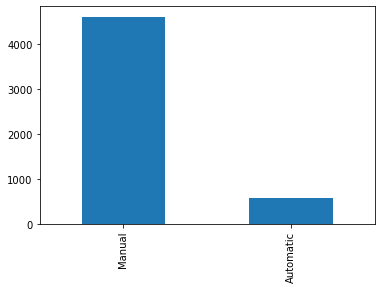

In [10]:
df['Transmission type'].value_counts().plot.bar() 

Most of the cars are Manual transmission.

In [11]:
df['Year'] = df.Name.str[:4] # Extracting year from name, and storing it as integer
df['Year'] = df['Year'].astype(int)

In [12]:
df.Name = df.Name.str[4:] # Slicing the name so that it doesn't contain the year

In [13]:
df.Mileage = df.Mileage.str[:-3] # Removing ' km' form end of Mileage and converting it to integer
df['Mileage'] = df['Mileage'].astype(int)

In [14]:
df.Price = df.Price.str[1:] # Removing the rupee symbol '₹' from price, and changign type to integer
df ['Price'] = df['Price'].astype(int)

In [15]:
df['Manufacturer'] = df['Name'].str.split(' ').str[1] # Removing white space, and separating Manufacturer name form car name
df['Model'] = df['Name'].str.split(' ').str[2]

In [16]:
df.head() # Checking if everythgin worked right, it has.

,Name,Transmission type,Variant,Mileage,Owned,Fuel type,City,Price,Year,Manufacturer,Model
0,Hyundai Verna,Manual,S PETROL MT,19158,1st Owner,Petrol,Rohtak,924099,2020,Hyundai,Verna
1,Hyundai Verna,Manual,FLUIDIC 1.4 CRDI CX,44585,2nd Owner,Diesel,Rohtak,546099,2014,Hyundai,Verna
2,Maruti Baleno,Manual,ZETA 1.2 K12,9483,2nd Owner,Petrol,Rohtak,615199,2018,Maruti,Baleno
3,Maruti Ertiga,Manual,VDI SHVS,94362,1st Owner,Diesel,Rohtak,584199,2016,Maruti,Ertiga
4,Hyundai Creta,Manual,1.6 E + VTVT,17227,2nd Owner,Petrol,Rohtak,812299,2017,Hyundai,Creta


In [17]:
df['Transmission type'].value_counts() # Value counts of transmission

Manual       4623
Automatic     580
Name: Transmission type, dtype: int64

In [18]:
df['Owned'].value_counts() # Value counts of Owned

1st Owner    4454
2nd Owner     768
3rd Owner     113
5th Owner       3
4th Owner       1
Name: Owned, dtype: int64

In [19]:
df['Fuel type'].value_counts() # Value counts of Fuel type

Petrol          3677
Diesel          1560
Petrol + CNG     101
Petrol + LPG       1
Name: Fuel type, dtype: int64

In [20]:
df['City'].value_counts() # Value counts of City

Mumbai        513
Delhi         432
Pune          419
Chandigarh    415
Ahmedabad     321
Bengaluru     305
Surat         299
Nasik         273
Chennai       264
Rajkot        256
Rohtak        237
Vadodara      235
Panipat       229
Jaipur        228
Kolkata       228
Meerut        227
Ludhiana      187
Kochi          97
Hyderabad      73
Lucknow        53
Bhopal         27
Mysore         21
Name: City, dtype: int64

In [21]:
df.describe() # Cheking some basic stats about our data

,Mileage,Price,Year
count,5.339000e+03,5.339000e+03,5339.000000
mean,4.427197e+04,5.763635e+05,2016.757258
std,3.781714e+04,2.889991e+05,2.383101
min,3.500000e+02,1.263990e+05,2008.000000
25%,1.753000e+04,3.865990e+05,2015.000000
50%,3.463100e+04,5.089990e+05,2017.000000
75%,6.236600e+04,6.823990e+05,2019.000000
max,1.002408e+06,2.938999e+06,2021.000000


Minimum Mileage 350 km;
Maximum Mileage 1,000,000 km

Oldest car: 2008;
Newest car: 2021

Minimum price: Rs. 126,000;
Maximum price of car: Rs. 29,380,000

#### EDA

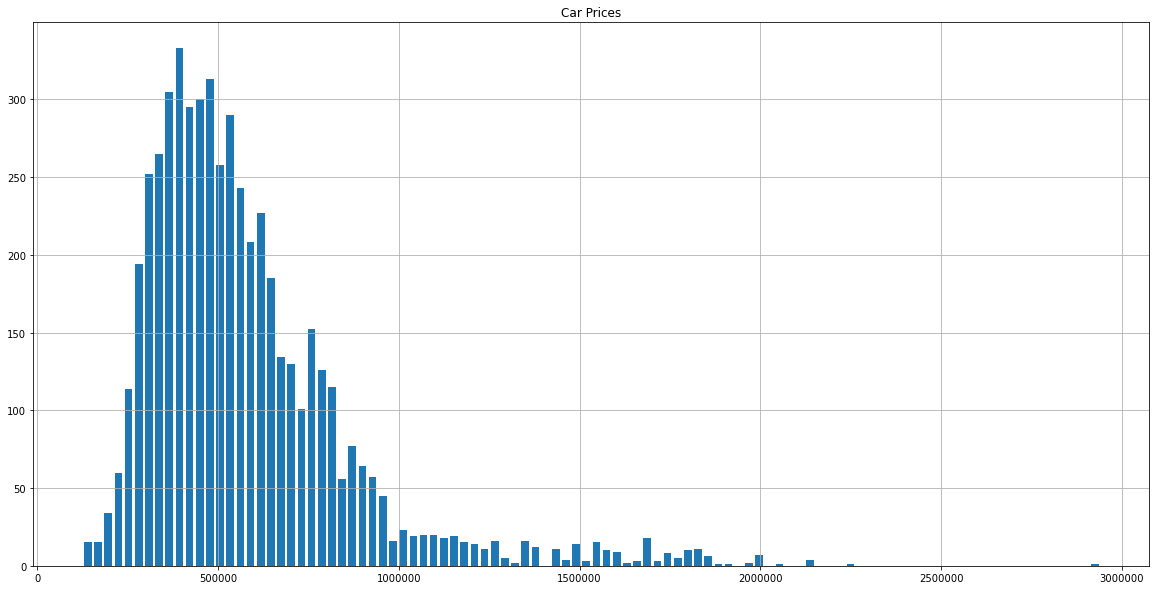

In [22]:
# Looking at distribution of selling price of car, which is our target variable.
# We can observe that the distribution is right skewed

df['Price'].hist(bins=100,figsize=(20,10),rwidth = 0.75)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Car Prices')
plt.show()

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

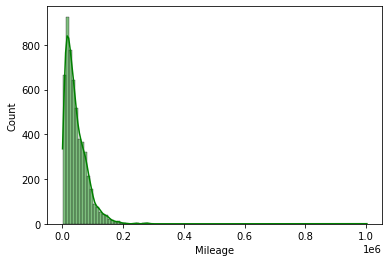

In [23]:
sns.histplot(df['Mileage'],bins = 100 , kde = True, color = 'green') # Most of the mileage of cars is less that 200,000 km

<AxesSubplot:xlabel='Year', ylabel='Count'>

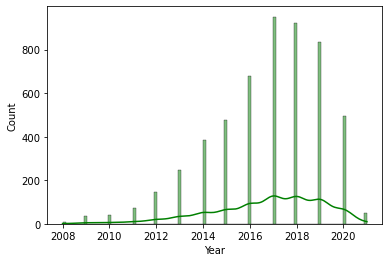

In [24]:
sns.histplot(df['Year'],bins = 100 , kde = True, color = 'green') # Most of the flight prices range from 2000-20000

We can see that most of the cars in this data were bought between 2015 and 2020

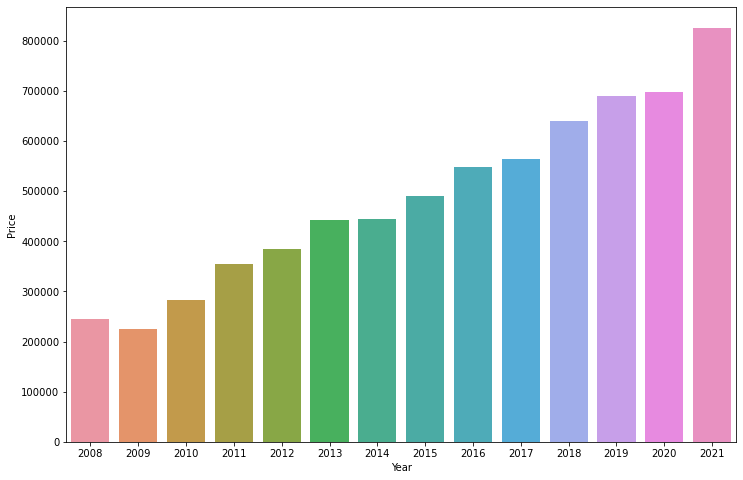

In [25]:
df_2 = df.groupby('Year').mean()
df_2.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Year', y='Price', data=df_2,ax=ax);

Average price of car vs year; we can see the average price of car increases if the car is not very old.

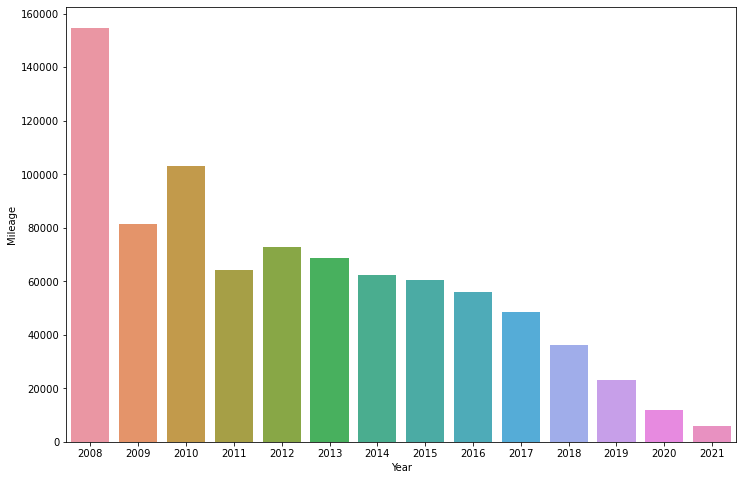

In [26]:
df_2 = df.groupby('Year').mean()
df_2.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Year', y='Mileage', data=df_2,ax=ax);

Average mileage in km on a car, based on the year the car was manufactured; we can observe that the mileage is more for older cars; as expected.

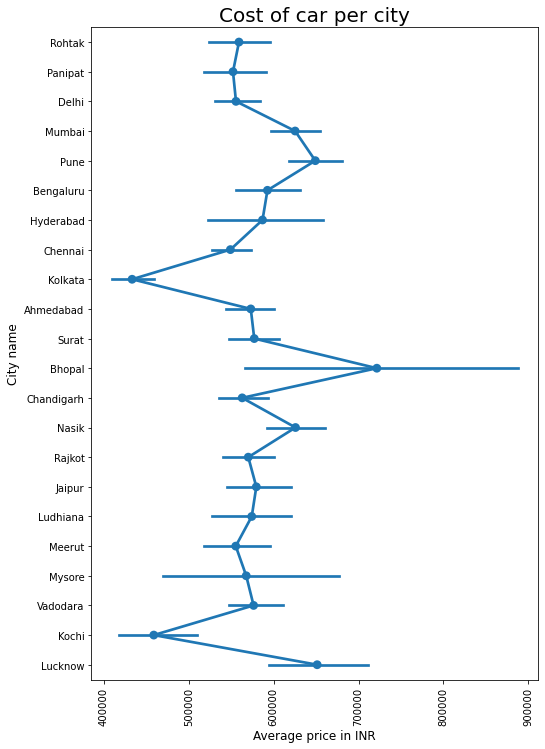

In [27]:
f,ax1 = plt.subplots(figsize = (8,12))
sns.pointplot(y = df.City, x = df['Price'], join=True, data= df )
plt.xticks(rotation = 90)
plt.title("Cost of car per city",{'fontsize':20})
plt.xlabel('Average price in INR',{'fontsize' : 'large'})
plt.ylabel('City name',{'fontsize':'large'})
plt.show()

Average price of car according to city in which it was listed. Bhopal has the most expensive cars and Kochi has the least expensive cars.

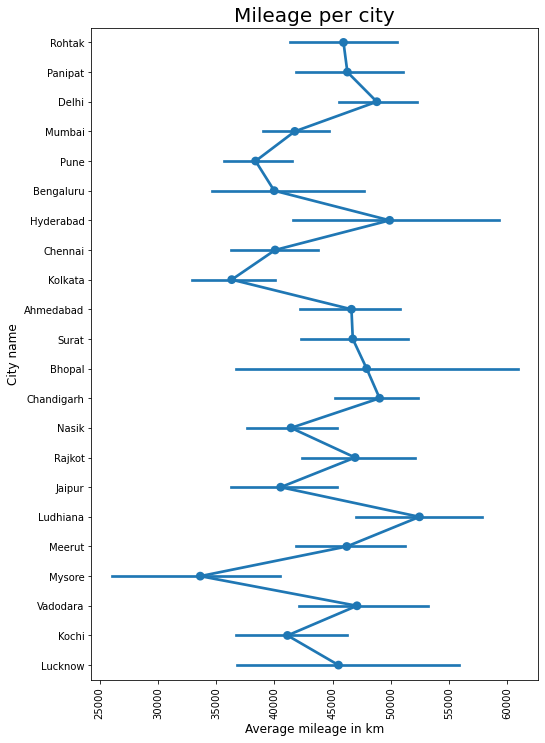

In [28]:
f,ax1 = plt.subplots(figsize = (8,12))
sns.pointplot(y = df.City, x = df['Mileage'], join=True, data= df )
plt.xticks(rotation = 90)
plt.title("Mileage per city",{'fontsize':20})
plt.xlabel('Average mileage in km',{'fontsize' : 'large'})
plt.ylabel('City name',{'fontsize':'large'})
plt.show()

Average mileage of car (in km) according to city in which it was listed. Ludhiiana has the most driven cars and Mysore has the least driven cars.

Checking the data for some cars

In [29]:
df[['Mileage']].idxmax() # Which df index has maximum mileage

Mileage    1879
dtype: int64

In [30]:
df.iloc[1879] # This car has max mileage

Name                  Hyundai i20
Transmission type          Manual
Variant              MAGNA O 1.2 
Mileage                   1002408
Owned                   2nd Owner
Fuel type                  Petrol
City                    Bengaluru
Price                      429399
Year                         2010
Manufacturer              Hyundai
Model                         i20
Name: 1879, dtype: object

In [31]:
df[['Price']].idxmax() # Which df index has maximum price

Price    2007
dtype: int64

In [32]:
df.iloc[2007] # This car has max price

Name                  Toyota Fortuner
Transmission type              Manual
Variant                   2.8 4x2 MT 
Mileage                         35464
Owned                       1st Owner
Fuel type                      Diesel
City                        Bengaluru
Price                         2938999
Year                             2018
Manufacturer                   Toyota
Model                        Fortuner
Name: 2007, dtype: object

In [33]:
df[['Price']].idxmin() # Which df index has minimum price

Price    92
dtype: int64

In [34]:
df.iloc[92] # This car has min price

Name                  Maruti Alto
Transmission type          Manual
Variant                      LXI 
Mileage                    119227
Owned                   1st Owner
Fuel type                  Petrol
City                       Rohtak
Price                      126399
Year                         2009
Manufacturer               Maruti
Model                        Alto
Name: 92, dtype: object

In [35]:
df[['Mileage']].idxmin() # Which df index has minimum mileage

Mileage    2059
dtype: int64

In [36]:
df.iloc[2059] # This car has min mileage

Name                        Ford Ecosport
Transmission type                  Manual
Variant              1.5 TITANIUM TI VCT 
Mileage                               350
Owned                           1st Owner
Fuel type                          Petrol
City                            Bengaluru
Price                             1045199
Year                                 2021
Manufacturer                         Ford
Model                            Ecosport
Name: 2059, dtype: object

#### Pre-processing data

In [37]:
df.nunique() # Now to simplify the data

Name                  115
Transmission type       2
Variant               529
Mileage              2539
Owned                   5
Fuel type               4
City                   22
Price                2167
Year                   14
Manufacturer           19
Model                 100
dtype: int64

In [38]:
df['Manufacturer'].value_counts() # We have a lot of manufacturers

Maruti        2880
Hyundai       1122
Ford           316
Honda          303
Toyota         135
Renault        126
Tata           109
Volkswagen     107
Mahindra        83
MG              36
KIA             27
Skoda           26
Audi            18
Datsun          18
Jeep            11
BMW             10
Nissan           8
Ssangyong        3
Mercedes         1
Name: Manufacturer, dtype: int64

Now I will simplify the engine size and convert it to a range, I will also convert various variants of engine to get a better description.

In [39]:
df.loc[df['Variant'].str.contains('LXI', case=False), 'Variant'] = 'Basic Petrol'
df.loc[df['Variant'].str.contains('VXI', case=False), 'Variant'] = 'Middle Petrol'
df.loc[df['Variant'].str.contains('ZXI', case=False), 'Variant'] = 'Top Petrol'

df.loc[df['Variant'].str.contains('VDI', case=False), 'Variant'] = 'Basic Diesel'
df.loc[df['Variant'].str.contains('VDI', case=False), 'Variant'] = 'Middle Diesel'
df.loc[df['Variant'].str.contains('ZDI', case=False), 'Variant'] = 'Top Diesel'

df.loc[df['Variant'].str.contains('LUXURY', case=False), 'Variant'] = 'Luxury'

df.loc[df['Variant'].str.contains('1.0', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.1', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.2', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.3', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.4', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.5', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.6', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('1.7', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('1.8', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('1.9', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('2.0', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('2.1', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.2', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.3', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.4', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.5', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.6', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.7', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.8', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.9', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.0', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.1', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.2', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.3', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.4', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.5', case=False), 'Variant'] = '2.0+ Liter'

df.loc[df['Variant'].str.contains('5 STR WITH AC PLUSHTR', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('RXL', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('V MT PETROL', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('ERA PLUS', case=False), 'Variant'] = '1.0-1.5 Liter'

In [40]:
df.loc[df.groupby('Variant').Variant.transform('count').lt(20), 'Variant'] = 'Other' 

# Combining variants as Other which have less than 20 value counts to simplify the data

In [41]:
df['Variant'].value_counts()

1.0-1.5 Liter    2189
Middle Petrol     981
Basic Diesel      495
Other             483
Basic Petrol      439
1.5-2.0 Liter     268
Top Diesel        227
Top Petrol        162
2.0+ Liter         95
Name: Variant, dtype: int64

In [42]:
df['Model'].value_counts() # We have 100 different car models

Alto      648
Swift     570
Baleno    274
Vitara    271
Grand     236
         ... 
Jetta       2
KAROQ       2
Benz        1
CRV         1
Zen         1
Name: Model, Length: 100, dtype: int64

In [43]:
df['Name'].value_counts() # We have 115 different names

 Maruti Swift             425
 Maruti Baleno            274
 Maruti Vitara Brezza     271
 Maruti Alto 800          259
 Hyundai Grand i10        236
                         ... 
 BMW X1                     2
 Nissan Micra Active        1
 Honda CRV                  1
 Maruti Zen Estilo          1
 Mercedes Benz E Class      1
Name: Name, Length: 115, dtype: int64

In [44]:
df.drop(['Name'], axis = 1, inplace = True) # Dropping the name columns as I have already separated it into 'Name' and 'Model'

### EDA

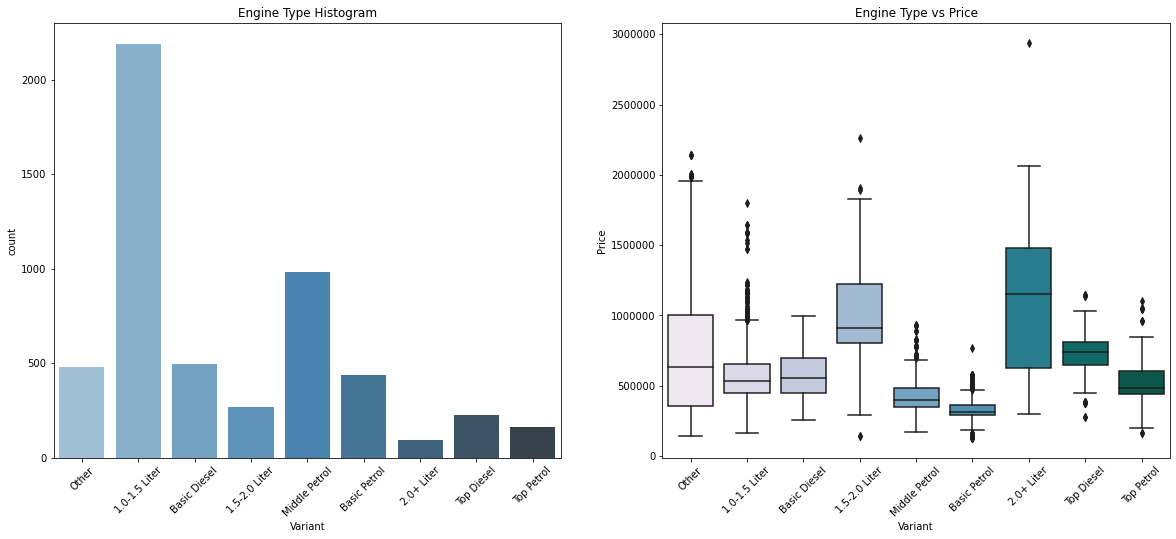

In [45]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
plt.xticks(rotation=45)
sns.countplot(df.Variant, palette=("Blues_d"))
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.Variant, y=df.Price, palette=("PuBuGn"))

plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Count plot and price plot according to the cars engine variant

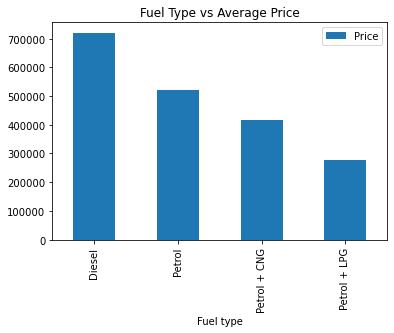

In [46]:
df_fuel = pd.DataFrame(df.groupby(['Fuel type'])['Price'].mean().sort_values(ascending = False))
df_fuel.plot.bar()
plt.ticklabel_format(style='plain', axis='y')
plt.title('Fuel Type vs Average Price')
plt.show()

Average price of car with respect to the fuel type. Diesel is most evpensive, then petrol, least expensive is Petrol + LPG

In [47]:
df.head()

,Transmission type,Variant,Mileage,Owned,Fuel type,City,Price,Year,Manufacturer,Model
0,Manual,Other,19158,1st Owner,Petrol,Rohtak,924099,2020,Hyundai,Verna
1,Manual,1.0-1.5 Liter,44585,2nd Owner,Diesel,Rohtak,546099,2014,Hyundai,Verna
2,Manual,1.0-1.5 Liter,9483,2nd Owner,Petrol,Rohtak,615199,2018,Maruti,Baleno
3,Manual,Basic Diesel,94362,1st Owner,Diesel,Rohtak,584199,2016,Maruti,Ertiga
4,Manual,1.5-2.0 Liter,17227,2nd Owner,Petrol,Rohtak,812299,2017,Hyundai,Creta


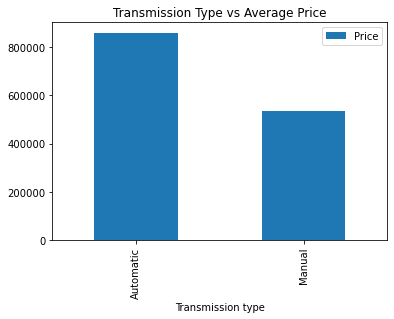

In [48]:
df_trans = pd.DataFrame(df.groupby(['Transmission type'])['Price'].mean().sort_values(ascending = False))
df_trans.plot.bar()
plt.ticklabel_format(style='plain', axis='y')
plt.title('Transmission Type vs Average Price')
plt.show()

As expected cars which have automatic transmission are on average priced above Rs. 80,000 and cars which have manual transmission are on average price around Rs 50,000

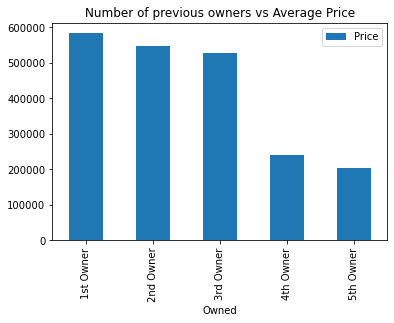

In [49]:
df_ownd = pd.DataFrame(df.groupby(['Owned'])['Price'].mean().sort_values(ascending = False))
df_ownd.plot.bar()
plt.ticklabel_format(style='plain', axis='y')
plt.title('Number of previous owners vs Average Price')
plt.show()

We can observe that as number of owners go up, the average price of car decreases, this is what one would expect.

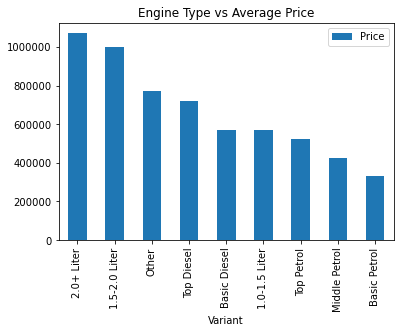

In [50]:
df_vrnt = pd.DataFrame(df.groupby(['Variant'])['Price'].mean().sort_values(ascending = False))
df_vrnt.plot.bar()

plt.title('Engine Type vs Average Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

We can see that 2 liter engine is the most common engine size.

#### Multi variate analysis

<Figure size 1080x1080 with 0 Axes>

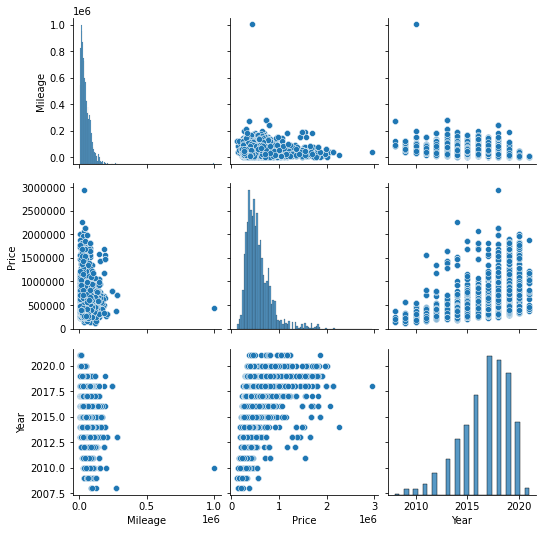

In [51]:
plt.figure(figsize=(15,15))
sns.pairplot(df)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

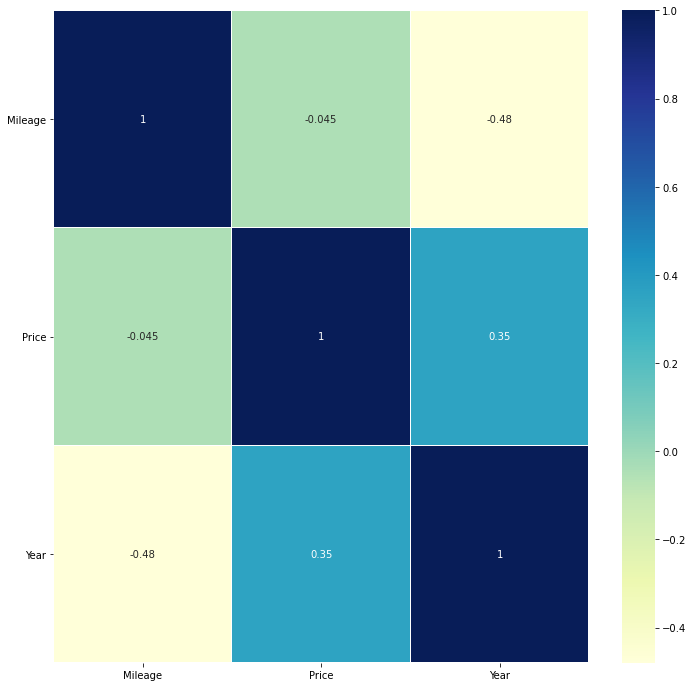

In [52]:
plt.figure(figsize=(12,12)) # Co-relation heat map
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0); # Checkign co-relation

In [53]:
df.loc[df.groupby('Model').Variant.transform('count').lt(20), 'Variant'] = 'Other'  
# If less that 20 count, Model is renamed to 'Other'

In [54]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the df

df = dummies('Transmission type',df)
df = dummies('Variant',df)
df = dummies('Owned',df)
df = dummies('Fuel type',df)
df = dummies('City',df)
df = dummies('Manufacturer',df)
df = dummies('Model',df)

In [55]:
df.head() # Dummy variables have been created

,Mileage,Price,Year,Manual,1.5-2.0 Liter,2.0+ Liter,Basic Diesel,Basic Petrol,Middle Petrol,Other,Top Diesel,Top Petrol,2nd Owner,3rd Owner,4th Owner,5th Owner,Petrol,Petrol + CNG,Petrol + LPG,Bengaluru,Bhopal,Chandigarh,Chennai,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Lucknow,Ludhiana,Meerut,Mumbai,Mysore,Nasik,Panipat,Pune,Rajkot,Rohtak,Surat,Vadodara,BMW,Datsun,Ford,Honda,Hyundai,Jeep,KIA,MG,Mahindra,Maruti,Mercedes,Nissan,Renault,Skoda,Ssangyong,Tata,Toyota,Volkswagen,5,A,A3,A4,ALTROZ,AURA,Accord,Alto,Amaze,Ameo,BR-V,Baleno,Benz,Bolero,Brio,CRV,Camry,Captur,Celerio,Ciaz,City,Civic,Compass,Corolla,Creta,Duster,Dzire,Ecosport,Eeco,Elite,Eon,Ertiga,Etios,FREESTYLE,Fiesta,Figo,Fortuner,GRAND,Glanza,Go,Grand,HECTOR,Harrier,Hexa,IGNIS,Innova,Jazz,Jetta,KAROQ,KUV,Kuv100,Kwid,Lodgy,MARAZZO,Micra,NEW,NEXON,Nano,New,OMNI,Octavia,Polo,Prius,Q3,Rapid,Redi,Rexton,Ritz,S,SELTOS,SONET,SX4,Santro,Scorpio,Sunny,Superb,Swift,TIGOR,TRIBER,TUV300,Thar,Tiago,Tucson,VENUE,Vento,Verna,Vitara,WR-V,Wagon,X1,XL6,XUV,XUV500,Xcent,YARIS,Zen,Zest,i10,i20
0,19158,924099,2020,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,44585,546099,2014,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9483,615199,2018,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,94362,584199,2016,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17227,812299,2017,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
df.shape # We have 5339 rows, and 157 coulmns after creating dummy variables

(5339, 157)

Skew of Pirce: 2.0398565390925087


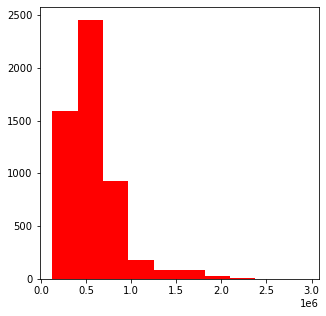

In [57]:
fig = plt.figure(figsize=(5,5))

print ("Skew of Pirce:", df.Price.skew())
plt.hist(df.Price,  color='red')
plt.show() # Checking skew of target variable

Skew of Log-Transformed Price: 0.3518219716476838


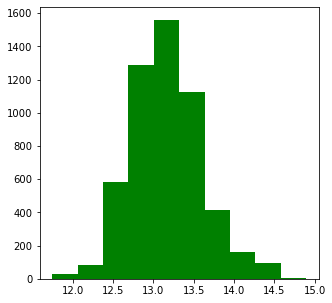

In [58]:
fig = plt.figure(figsize=(5,5))

print ("Skew of Log-Transformed Price:", np.log1p(df.Price).skew())
plt.hist(np.log1p(df.Price), color='green')
plt.show() # Fixing the skew by taking log

Skew of Mileage 4.327838952335529


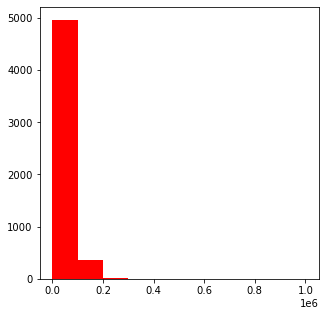

In [59]:
fig = plt.figure(figsize=(5,5))

print ("Skew of Mileage", df.Mileage.skew())
plt.hist(df.Mileage,  color='red')
plt.show() # Checking skew of variable

Skew of Log-Transformed Mileage -0.7418179550641549


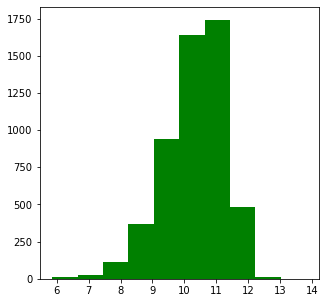

In [60]:
fig = plt.figure(figsize=(5,5))

print ("Skew of Log-Transformed Mileage", np.log1p(df.Mileage).skew())
plt.hist(np.log1p(df.Mileage), color='green')
plt.show() # Reducting the skew by taking log

### Model building phase

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, cross_val_predict
import sklearn.metrics as sm
from math import e
# Importing useful libraries

In [62]:
df.head()

,Mileage,Price,Year,Manual,1.5-2.0 Liter,2.0+ Liter,Basic Diesel,Basic Petrol,Middle Petrol,Other,Top Diesel,Top Petrol,2nd Owner,3rd Owner,4th Owner,5th Owner,Petrol,Petrol + CNG,Petrol + LPG,Bengaluru,Bhopal,Chandigarh,Chennai,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Lucknow,Ludhiana,Meerut,Mumbai,Mysore,Nasik,Panipat,Pune,Rajkot,Rohtak,Surat,Vadodara,BMW,Datsun,Ford,Honda,Hyundai,Jeep,KIA,MG,Mahindra,Maruti,Mercedes,Nissan,Renault,Skoda,Ssangyong,Tata,Toyota,Volkswagen,5,A,A3,A4,ALTROZ,AURA,Accord,Alto,Amaze,Ameo,BR-V,Baleno,Benz,Bolero,Brio,CRV,Camry,Captur,Celerio,Ciaz,City,Civic,Compass,Corolla,Creta,Duster,Dzire,Ecosport,Eeco,Elite,Eon,Ertiga,Etios,FREESTYLE,Fiesta,Figo,Fortuner,GRAND,Glanza,Go,Grand,HECTOR,Harrier,Hexa,IGNIS,Innova,Jazz,Jetta,KAROQ,KUV,Kuv100,Kwid,Lodgy,MARAZZO,Micra,NEW,NEXON,Nano,New,OMNI,Octavia,Polo,Prius,Q3,Rapid,Redi,Rexton,Ritz,S,SELTOS,SONET,SX4,Santro,Scorpio,Sunny,Superb,Swift,TIGOR,TRIBER,TUV300,Thar,Tiago,Tucson,VENUE,Vento,Verna,Vitara,WR-V,Wagon,X1,XL6,XUV,XUV500,Xcent,YARIS,Zen,Zest,i10,i20
0,19158,924099,2020,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,44585,546099,2014,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9483,615199,2018,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,94362,584199,2016,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17227,812299,2017,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
X=df.drop(['Price'], axis = 1, inplace = False) # Training variables
y=df['Price'] # Testing variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (4271, 156)
Y Train Shape  (4271,)
X Test Shape  (1068, 156)
Y Test Shape  (1068,)


### Decision tree regressor

In [64]:
dtr = DecisionTreeRegressor(random_state=5)
dtr.fit(X_train, y_train)
y_pred_dt = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.9244399834590671

In [65]:
scr = cross_val_score(dtr, X,y, cv=4)
print(scr.mean())

0.9127767628601462


In [66]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_dt), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_dt), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_dt), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_dt), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_dt), 2))

Mean absolute error = 24799.06
Mean squared error = 5127640478.85
Median absolute error = 0.0
Explain variance score = 0.92
R2 score = 0.92


### Random forest regression

In [67]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.9600850809439998

In [68]:
scr = cross_val_score(rfr, X,y, cv=4)
print(scr.mean())

0.9347715160471913


In [69]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_rfr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_rfr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_rfr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_rfr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_rfr), 2))

Mean absolute error = 28358.72
Mean squared error = 2708699177.57
Median absolute error = 13088.0
Explain variance score = 0.96
R2 score = 0.96


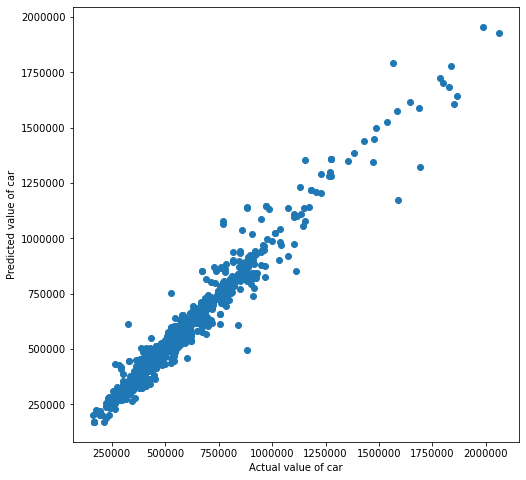

In [70]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred_rfr)
plt.xlabel("Actual value of car")
plt.ylabel("Predicted value of car")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

<AxesSubplot:xlabel='Price', ylabel='Density'>

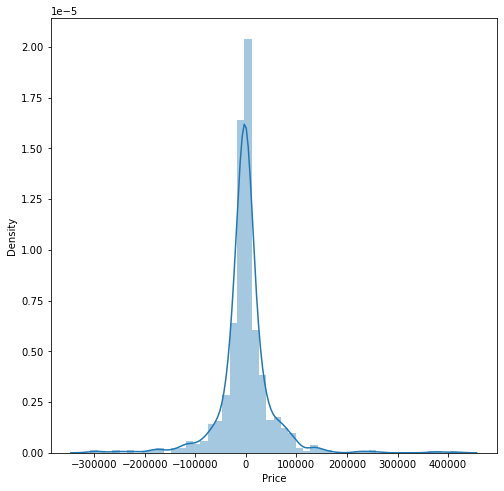

In [71]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-y_pred_rfr)

## Taking log of Price, Mileage and min-max of year data 

In [72]:
df['Price'] = np.log(df['Price'])
df['Mileage'] = np.log(df['Mileage'])
df['Year']=(df['Year']-df['Year'].min())/(df['Year'].max()-df['Year'].min())

In [73]:
X=df.drop(['Price'], axis = 1, inplace = False)
y=df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (4271, 156)
Y Train Shape  (4271,)
X Test Shape  (1068, 156)
Y Test Shape  (1068,)


### Random forest regression 

In [74]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.9643752320751121

In [75]:
scr = cross_val_score(rfr, X,y, cv=4)
print(scr.mean())

0.9423033540283878


### Decision tree regressor 

In [76]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=5)
dtr.fit(X_train, y_train)
y_pred_dt = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.9417958855360118

In [77]:
scr = cross_val_score(dtr, X,y, cv=4)
print(scr.mean())

0.9194896106985366


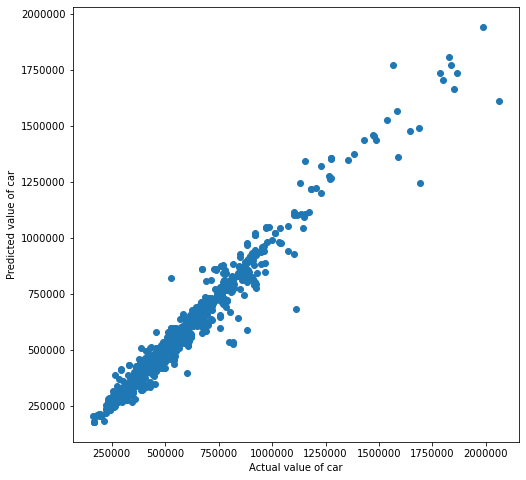

In [78]:
plt.figure(figsize=(8,8)) # Scatter plot of predicted vs actual values
plt.scatter(e**(y_test),e**(y_pred_rfr))
plt.xlabel("Actual value of car")
plt.ylabel("Predicted value of car")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

<AxesSubplot:xlabel='Price', ylabel='Density'>

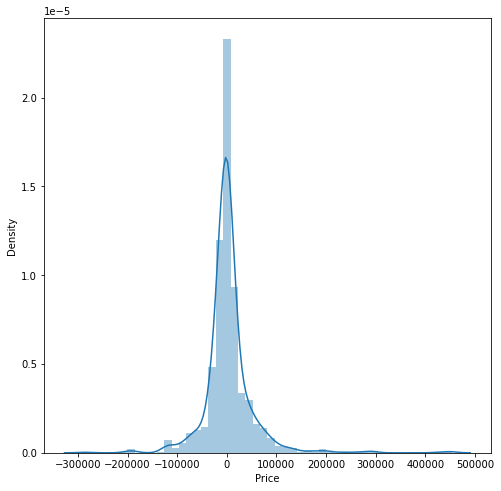

In [79]:
plt.figure(figsize=(8,8))
sns.distplot(e**y_test-e**y_pred_rfr) # As I took log before, re-converting the values to real prices

### Support vector regression

In [80]:
svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
svr.score(X_test, y_test)

0.8721726171837489

In [81]:
scr = cross_val_score(svr, X,y, cv=5)
print(scr.mean())

0.8363282884121721


### Hyper paramter tuning

I will be performing hyper parameter tuning on the random forest regressor model, as it gave the best performance.

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
parameters = { 'n_estimators' : [100,150],
               'min_samples_leaf' : [1,2], 
              'min_samples_split': [2,3],
              'criterion': ['mse','mae']
}

In [84]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [85]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 150]})


In [86]:
GCV.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}


Training model according to the best parameters

In [87]:
mod = RandomForestRegressor(min_samples_leaf= 1, min_samples_split =2, n_estimators = 150, criterion='mse')
mod.fit(X_train,y_train)
pred = mod.predict(X_test)
mod.score(X_test,y_test)

0.9630274955526736

In [88]:
scr = cross_val_score(mod, X,y, cv=4)
print(scr.mean())

0.94254259734771


As we can observe hyper parameter tuning improved the r^2 score to 0.943 which is good.

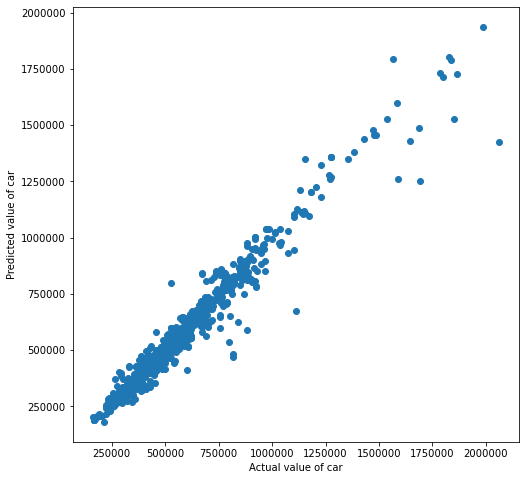

In [89]:
plt.figure(figsize=(8,8))
plt.scatter(e**y_test,e**pred)
plt.xlabel("Actual value of car")
plt.ylabel("Predicted value of car")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

Scatter plot of predicted vs actual values, we can se ethat there are some outliers, but most of the values lie in a stright line at 45deg which is optimal. 

We also got a much tighter fir near 0 deviation which means our model is performing well.

<AxesSubplot:xlabel='Price', ylabel='Density'>

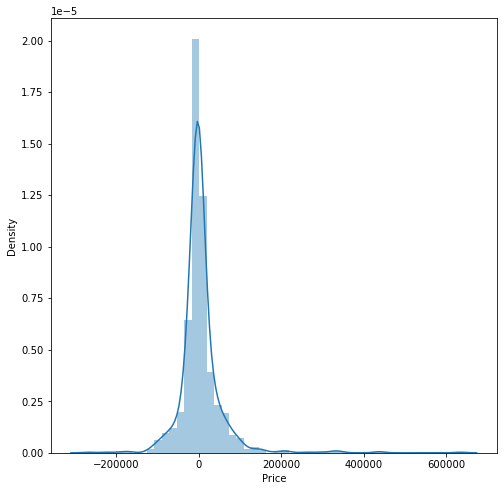

In [90]:
plt.figure(figsize=(8,8))
sns.distplot(e**y_test-e**pred) # As I took log before, re-converting the values to real prices

#### Checking the Concordance index

In [91]:
from lifelines.utils import concordance_index
print(f'Concordance index: {concordance_index(y_test, pred)}')

Concordance index: 0.9487433647587257


We got Concordance index: 0.9487433647587257, which is a very good value. and it mease that the model is performing great.

### Saving the model

In [92]:
import joblib
joblib.dump(mod,"CarPricePred.pkl")

['CarPricePred.pkl']
